In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
train = pd.read_csv("dataset/train_redu.csv")

test = pd.read_csv("dataset/test_redu.csv")

In [3]:
train.head()

,label,intensidade,simetria
0,0,145.435294,148.572549
1,0,118.576471,137.113725
2,0,127.600000,134.047059
3,0,138.047059,151.003922
4,0,146.215686,122.501961


In [4]:
test.head()

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510


In [5]:
def filtrar_digitos(train, test, digito1, digito2):
    """
    Filtra os dados de treino e teste para conter apenas dois dígitos específicos.

    Parâmetros:
        train (pd.DataFrame): Dataset de treino com colunas ['label', 'intensidade', 'simetria'].
        test (pd.DataFrame): Dataset de teste com colunas ['label', 'intensidade', 'simetria'].
        digito1 (int): Primeiro dígito para análise (ex: 1).
        digito2 (int): Segundo dígito para análise (ex: 5).
    
    Retorna:
        (train_filtrado, test_filtrado): DataFrames filtrados contendo apenas os dois dígitos.
    """
    selecionados = [digito1, digito2]
    
    train_filtrado = train[train['label'].isin(selecionados)]
    test_filtrado = test[test['label'].isin(selecionados)]
    
    # Resetar índices para evitar problemas depois
    return train_filtrado.reset_index(drop=True), test_filtrado.reset_index(drop=True)

In [6]:
train1x5, test1x5 = filtrar_digitos(train, test, 1, 5)

In [14]:
# caso queira salvar os dataframes filtrados

#train1x5.to_csv('train1x5.csv', index=False)
#test1x5.to_csv('test1x5.csv', index=False)

In [7]:
train1x5.head()

,label,intensidade,simetria
0,1,44.701961,69.270588
1,1,59.850980,83.443137
2,1,48.552941,79.043137
3,1,69.435294,72.878431
4,1,51.541176,84.611765


In [18]:
test1x5.head()

,label,intensidade,simetria
0,1,4.937475,8.064226
1,1,6.930272,10.462185
2,5,15.373149,17.944178
3,1,8.102741,4.659864
4,5,10.913365,13.678471


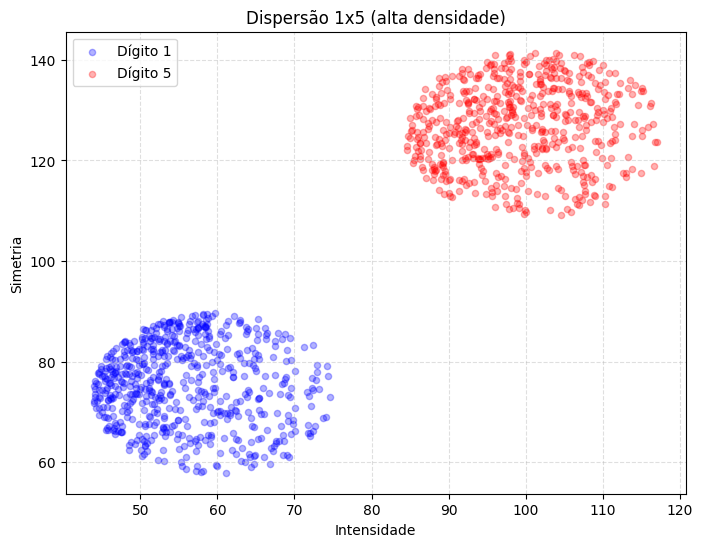

In [8]:
plt.figure(figsize=(8,6))

# Plotar dígito 1 (azul)
classe1 = train1x5[train1x5['label'] == 1]
plt.scatter(classe1['intensidade'], classe1['simetria'], 
            color='blue', label='Dígito 1', alpha=0.3, s=20)

# Plotar dígito 5 (vermelho)
classe5 = train1x5[train1x5['label'] == 5]
plt.scatter(classe5['intensidade'], classe5['simetria'], 
            color='red', label='Dígito 5', alpha=0.3, s=20)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Dispersão 1x5 (alta densidade)')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


=== Perceptron ===
[[1129    6]
 [ 687  205]]
              precision    recall  f1-score   support

           1       0.62      0.99      0.77      1135
           5       0.97      0.23      0.37       892

    accuracy                           0.66      2027
   macro avg       0.80      0.61      0.57      2027
weighted avg       0.78      0.66      0.59      2027



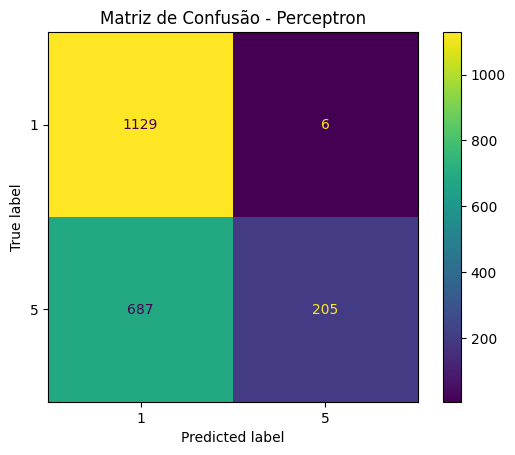

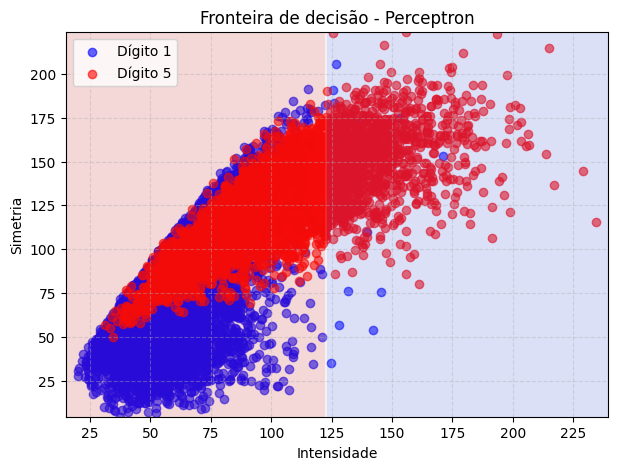


=== Logistic Regression ===
[[994 141]
 [158 734]]
              precision    recall  f1-score   support

           1       0.86      0.88      0.87      1135
           5       0.84      0.82      0.83       892

    accuracy                           0.85      2027
   macro avg       0.85      0.85      0.85      2027
weighted avg       0.85      0.85      0.85      2027



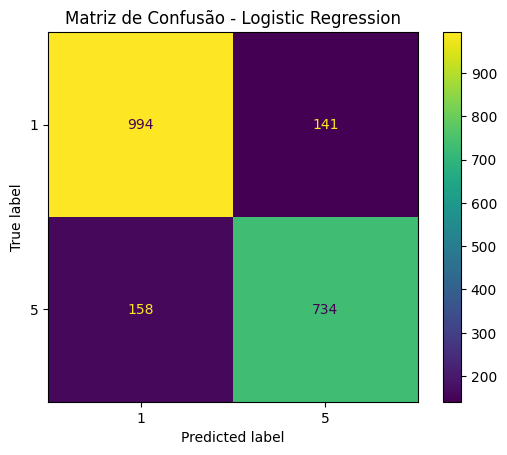

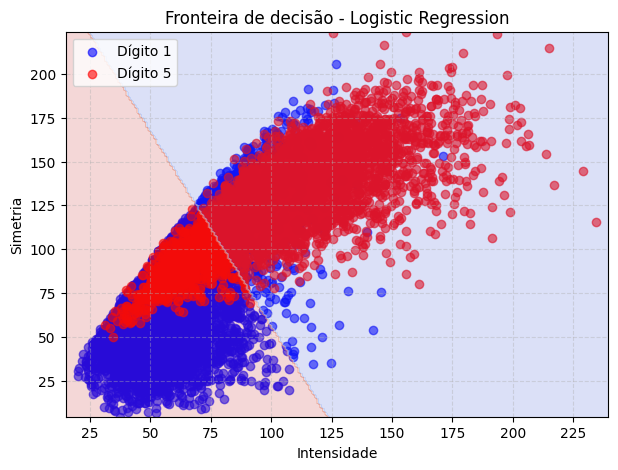


=== SVM Linear ===
[[996 139]
 [162 730]]
              precision    recall  f1-score   support

           1       0.86      0.88      0.87      1135
           5       0.84      0.82      0.83       892

    accuracy                           0.85      2027
   macro avg       0.85      0.85      0.85      2027
weighted avg       0.85      0.85      0.85      2027



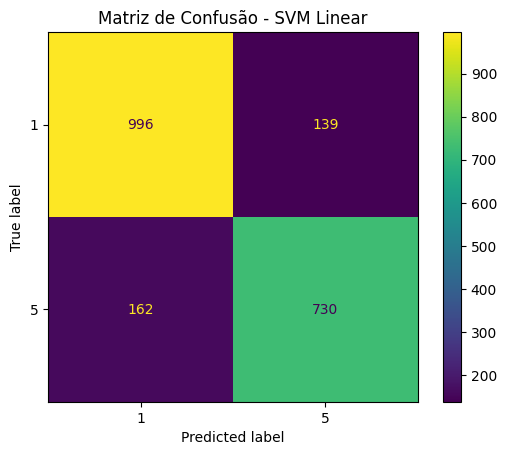

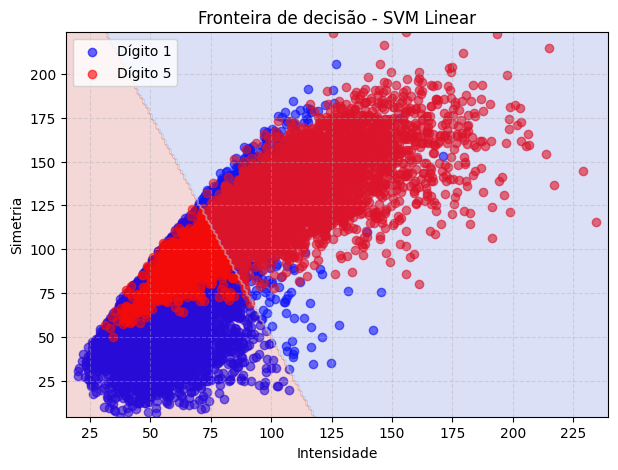

In [10]:

X_train = train1x5[['intensidade', 'simetria']].values
y_train = np.where(train1x5['label'] == 1, 1, -1)  # +1 para 1, -1 para 5

X_test = test1x5[['intensidade', 'simetria']].values
y_test_labels = test1x5['label'].values
y_test = np.where(y_test_labels == 1, 1, -1)


classifiers = {
    "Perceptron": Perceptron(max_iter=1000, tol=1e-3),
    "Logistic Regression": LogisticRegression(),
    "SVM Linear": SVC(kernel='linear')
}


def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(7,5))
    
    # Plotar dados
    plt.scatter(X[y==1,0], X[y==1,1], color="blue", label="Dígito 1", alpha=0.6)
    plt.scatter(X[y==-1,0], X[y==-1,1], color="red", label="Dígito 5", alpha=0.6)
    
    # Criar malha para fronteira
    x_min, x_max = X[:,0].min()-5, X[:,0].max()+5
    y_min, y_max = X[:,1].min()-0.01, X[:,1].max()+0.01
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([1 if z==1 else -1 for z in Z])  
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
    plt.xlabel("Intensidade")
    plt.ylabel("Simetria")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    
    y_pred_labels = np.where(y_pred == 1, 1, 5)
    
    # Métricas
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test_labels, y_pred_labels))
    print(classification_report(y_test_labels, y_pred_labels))
    
    # Mostrar matriz de confusão
    ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels)
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()
    
    # Plotar fronteira de decisão
    plot_decision_boundary(clf, X_train, y_train, f"Fronteira de decisão - {name}")